In [1]:
import pandas as pd
tmdb_content = pd.read_csv('src/TMDB_content.csv')

director = 3448
cast = 4610
keywords = 3989
genres = 2041


In [179]:
import pandas as pd
import spacy
import en_core_web_sm
import re
from spacy.lang.en.stop_words import STOP_WORDS

tmdb_content = pd.read_csv('src/TMDB_content.csv')
nlp = en_core_web_sm.load()

nlp.max_length = 15000000

corpus_director = tmdb_content['director'].repeat(4).str.replace(' ', '').str.strip().value_counts().head(100).reset_index()
corpus_director = corpus_director.loc[corpus_director.index.repeat(corpus_director['count'])]
corpus_director = corpus_director['director'].to_list()
corpus_cast = tmdb_content['cast'].repeat(2).str.replace(' ', '').str.split(',').explode().value_counts().head(100).reset_index()
corpus_cast = corpus_cast.loc[corpus_cast.index.repeat(corpus_cast['count'])]
corpus_cast = corpus_cast['cast'].to_list()
corpus_keywords = tmdb_content['keywords'].str.replace(' ', '').str.split(',').explode().value_counts().head(100).reset_index()
corpus_keywords['count'] = corpus_keywords['count'] / 2
corpus_keywords = corpus_keywords.loc[corpus_keywords.index.repeat(corpus_keywords['count'])]
corpus_keywords = corpus_keywords['keywords'].to_list()
corpus_genres = tmdb_content['genres'].str.replace(' ', '').str.split(',').explode().value_counts().head(100).reset_index()
corpus_genres['count'] = corpus_genres['count'] / 2
corpus_genres = corpus_genres.loc[corpus_genres.index.repeat(corpus_genres['count'])]
corpus_genres = corpus_genres['genres'].to_list()

print(f'director = {len(corpus_director)}')
print(f'cast = {len(corpus_cast)}')
print(f'keywords = {len(corpus_keywords)}')
print(f'genres = {len(corpus_genres)}')

corpus = corpus_director + corpus_cast + corpus_keywords + corpus_genres

corpus = [str(i).strip() if pd.notna(i) else '' for i in corpus]
corpus = ' '.join(corpus)
corpus = re.sub('[!\'\"#$%&()*+,-./:;<=>?@\[\]^_`{|}~\\\]+','', corpus)
corpus = corpus.lower()

doc = nlp(corpus)

lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS]

corpus_lemma = ' '.join(lemma)

director = 3448
cast = 4610
keywords = 3989
genres = 4092


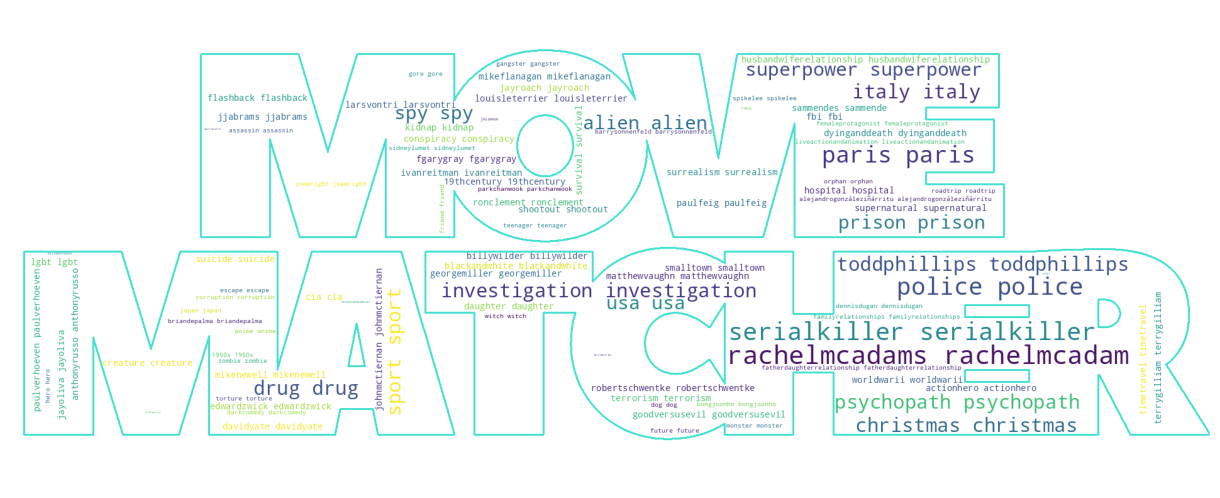

In [182]:
import matplotlib.pyplot as plt
import wordcloud
from PIL import Image
import numpy as np

moviematcher_mask = np.array(Image.open("img/moviematcher2.png"))

STOP_WORDS.update([i for i in pd.Series(lemma).value_counts().head(10).index])

wd = wordcloud.WordCloud(stopwords=STOP_WORDS, background_color='white', mask=moviematcher_mask, contour_width=2, contour_color='turquoise')

cloud = wd.generate(corpus_lemma)

# Afficher le nuage de mots
plt.figure(figsize=(12, 12))
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()